    Age Primary streaming service  Hours per day While working  \
0  18.0                   Spotify            4.0            No   
1  61.0             YouTube Music            2.5           Yes   
2  18.0                   Spotify            4.0           Yes   
3  18.0                   Spotify            5.0           Yes   
4  18.0             YouTube Music            3.0           Yes   

  Instrumentalist Composer         Fav genre Exploratory Foreign languages  \
0              No       No  Video game music          No               Yes   
1              No      Yes              Jazz         Yes               Yes   
2              No       No               R&B         Yes                No   
3             Yes      Yes              Jazz         Yes               Yes   
4             Yes       No  Video game music         Yes               Yes   

     BPM  ...  K pop_frequency  Latin_frequency  Lofi_frequency  \
0  132.0  ...                3                0               2   


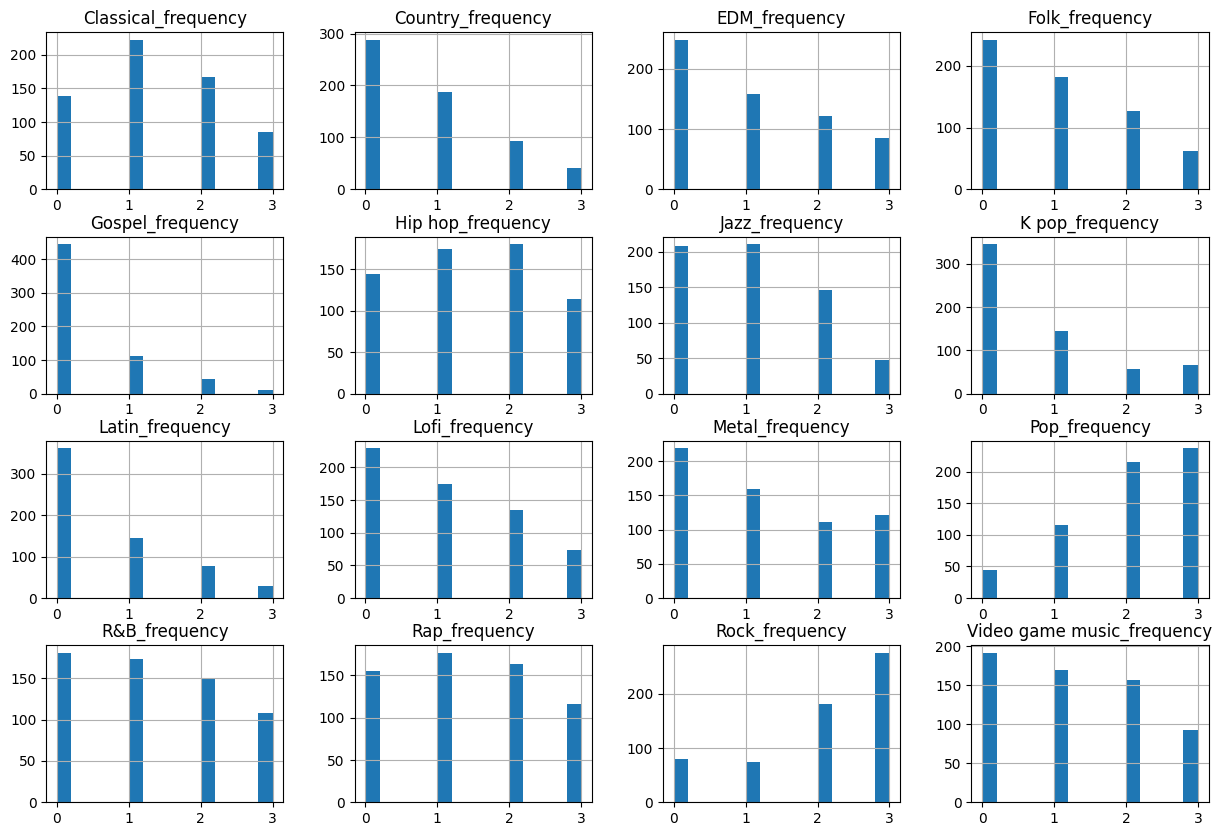

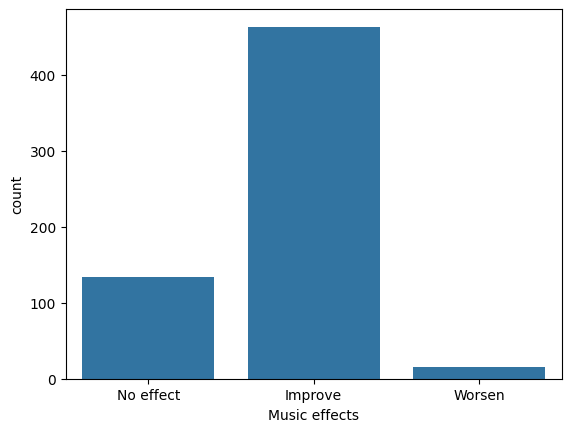

Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Acurácia: 0.7649880095923262
              precision    recall  f1-score   support

     Improve       0.72      0.63      0.67       142
   No effect       0.68      0.71      0.69       134
      Worsen       0.88      0.95      0.91       141

    accuracy                           0.76       417
   macro avg       0.76      0.76      0.76       417
weighted avg       0.76      0.76      0.76       417



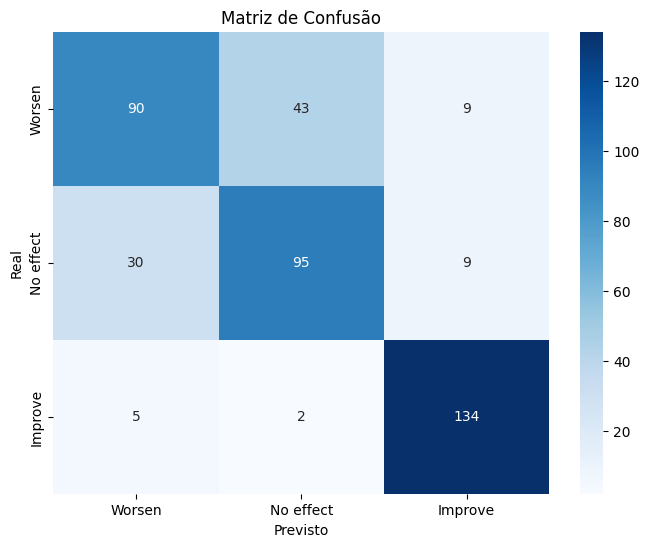

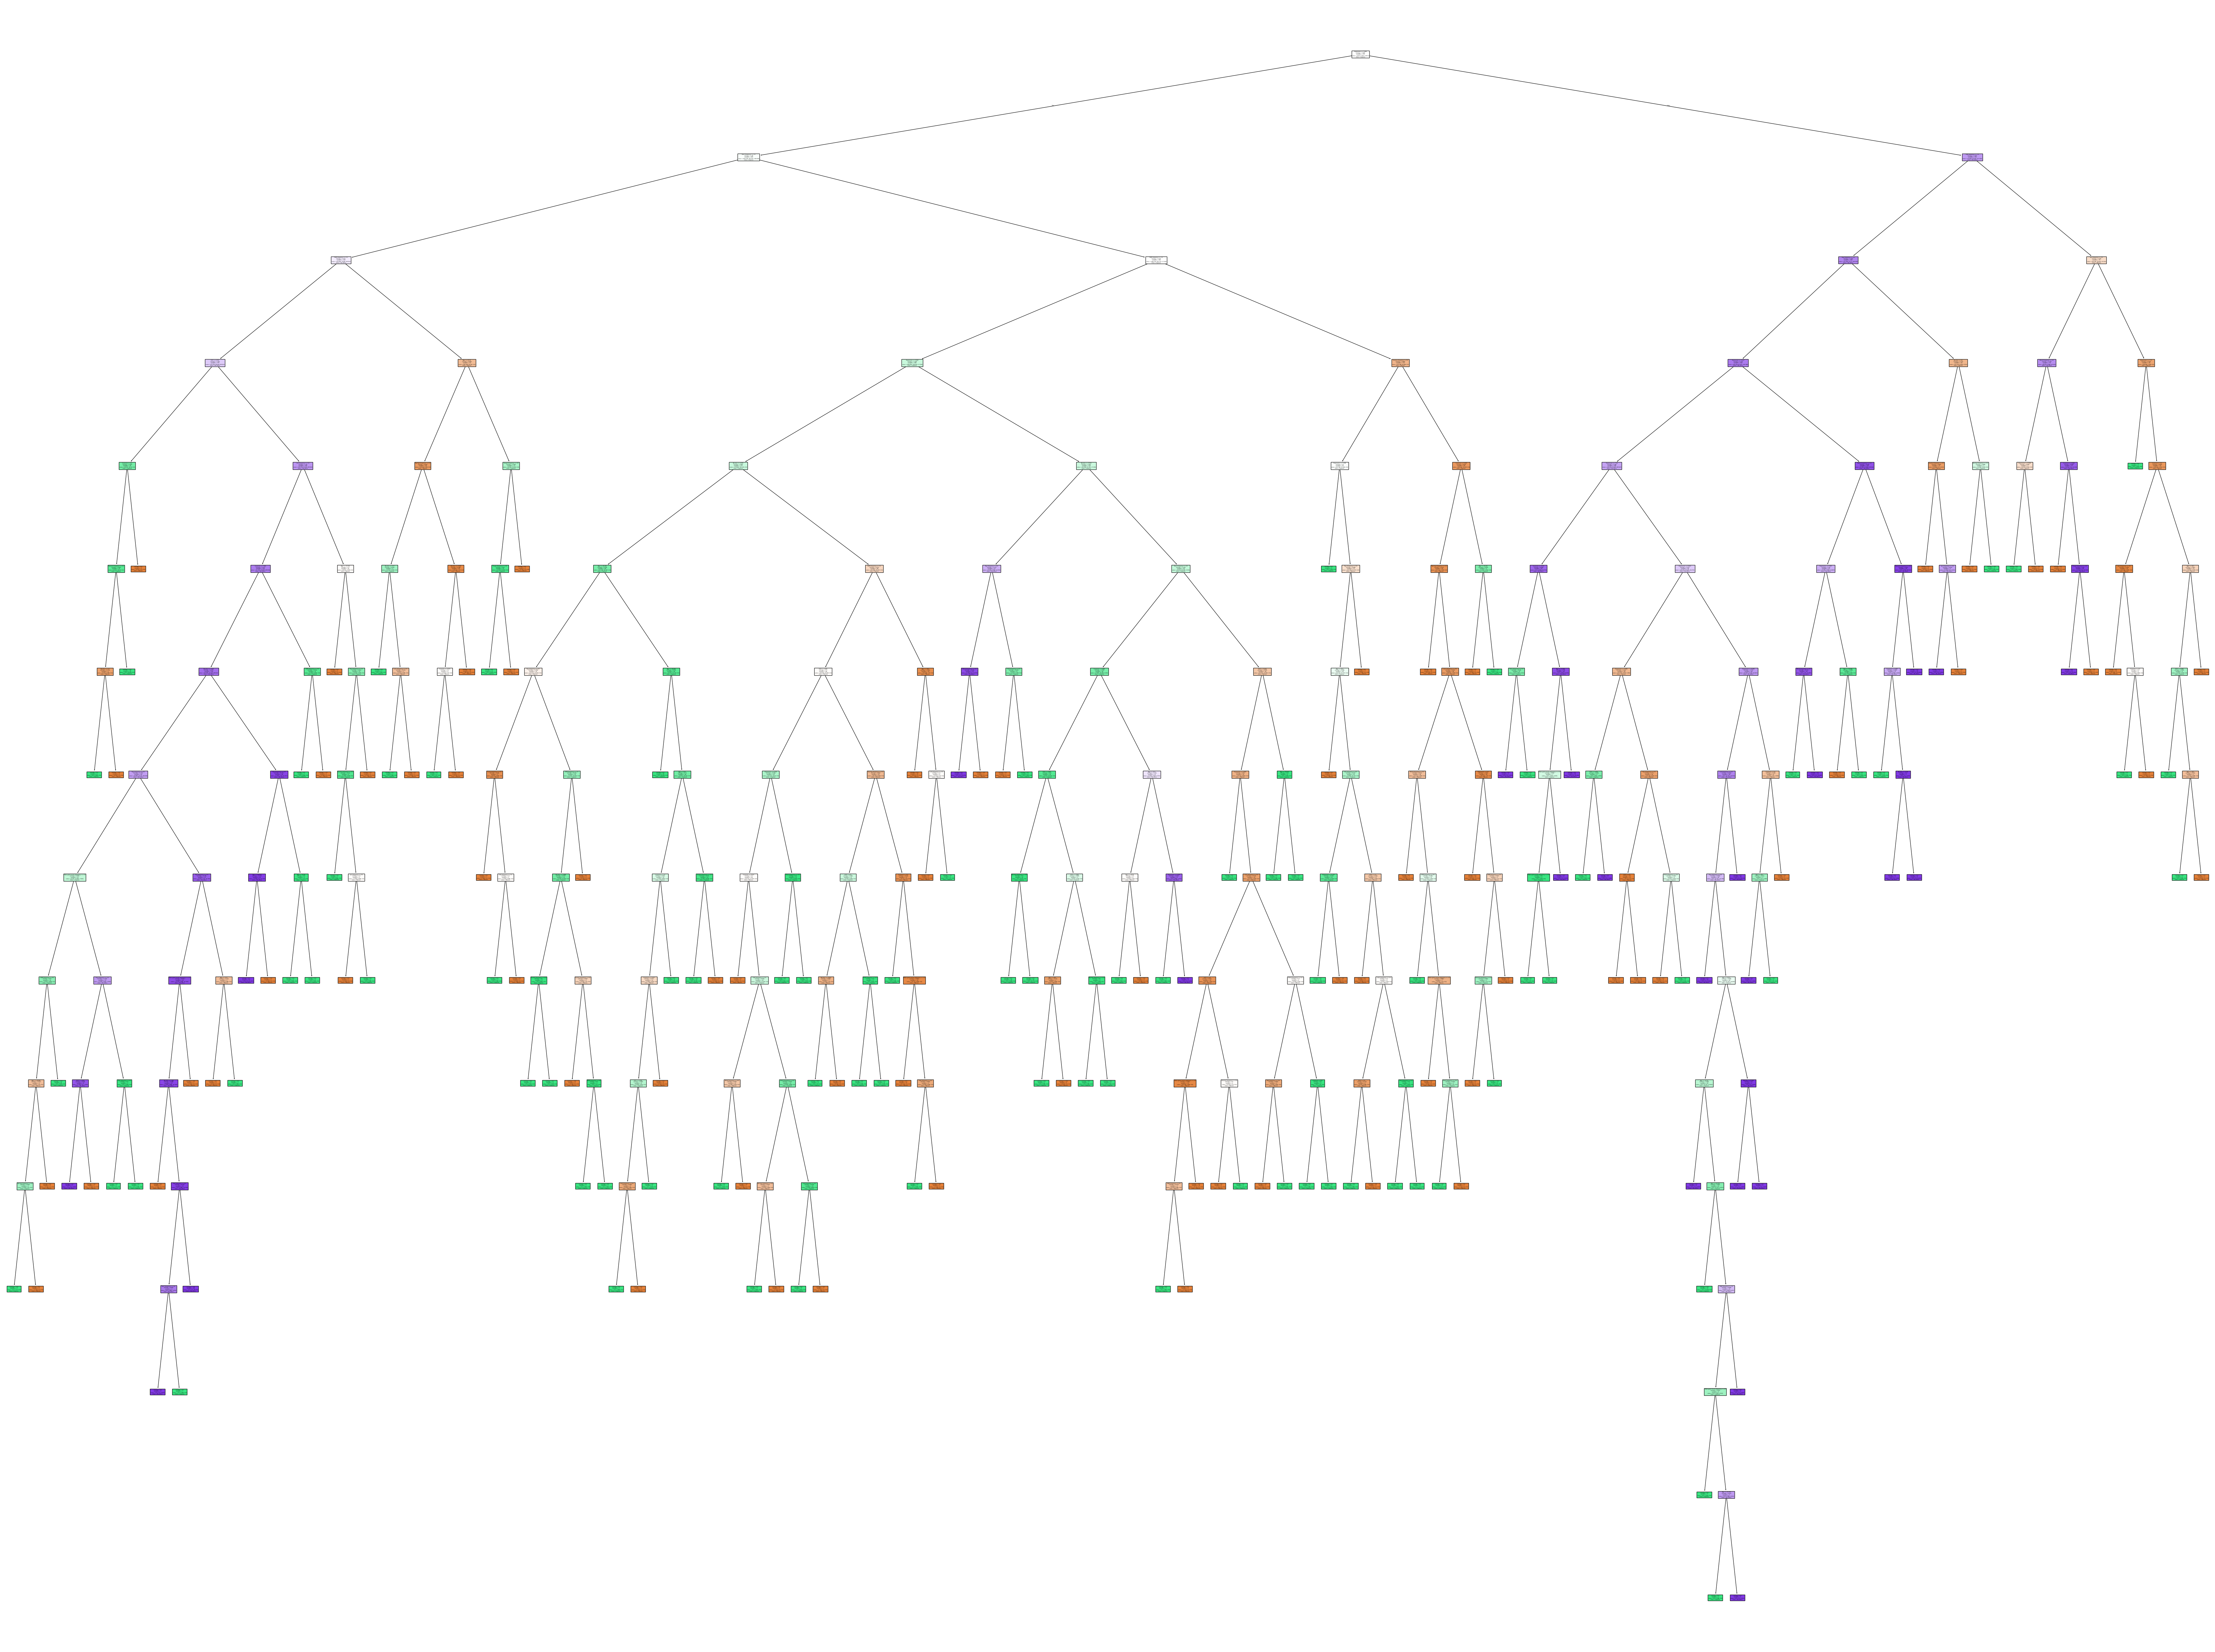

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

# Carregando dataset
file_path = 'C:/Users/tulio/Downloads/dados_tratados_V2.csv'
data = pd.read_csv(file_path, delimiter=';')

# Informações iniciais
print(data.head())
print(data.info())

# Visualização da distribuição das frequências dos estilos musicais
style_columns = [col for col in data.columns if 'frequency' in col]
data[style_columns].hist(bins=15, figsize=(15, 10))
plt.show()

# Relação entre frequência de gêneros musicais e "Music effects"
sns.countplot(x='Music effects', data=data)
plt.show()

data_clean = data.dropna(subset=['Music effects'])

data_clean['Music effects'] = data_clean['Music effects'].map({'Improve': 1, 'No effect': 0, 'Worsen': -1})


# Define X e y
X = data[style_columns + ['Anxiety', 'Depression', 'Insomnia', 'OCD', 'Age']]
y = data['Music effects']

# Balancear os dados com SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Definir treinamento e teste do modelo
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# # Definição de hiperparâmetros
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# # Treinamento do modelo
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    param_grid,
    cv=5,
    scoring='f1_macro'
)
grid_search.fit(X_train, y_train)

# Parâmetros melhor avaliados
best_model = grid_search.best_estimator_
print("Melhores parâmetros:", grid_search.best_params_)

# Métricas
y_pred = best_model.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Worsen', 'No effect', 'Improve'], yticklabels=['Worsen', 'No effect', 'Improve'])
plt.title("Matriz de Confusão")
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.show()

# Árvore de decisão
plt.figure(figsize=(100, 75))
plot_tree(best_model, feature_names=X.columns, class_names=['Worsen', 'Improve', 'No effect'], filled=True)
plt.show()
